In [44]:
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import glob
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import scipy as s
import scipy.integrate
from scipy.integrate import simps
from scipy.integrate import quadrature
import scipy.interpolate
from scipy.interpolate import griddata
from matplotlib import rcParams

matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 13})
matplotlib.rcParams['lines.linewidth'] = 1

STARf='/Users/mark/Desktop/DILUTE_DENSE/STAR_DATA/invNevtdNevtdNrawch_FIG2_2_minbias.txt'
STARdata=np.loadtxt(STARf)
dNdyAVGSTAR=10.2
f={}
# f[0]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_dmin05_combined.txt'
# f[1]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_dmin08_COMBINED.txt'
# f[2]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_dmin12_m01.txt'

# f[0]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_dmin05_combined.txt'
# f[1]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_dmin05_Qsmu07fluct04_m01_COMBINED.txt'
# f[2]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_dmin05_Qsmu07fluct03_m01_COMBINED.txt'
# f[3]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu07fluct01m01.txt'
# f[4]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu07fluct0m01.txt'Nfiles=3

# Nfiles=4
# f[0]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu07fluct05m01.txt'
# f[1]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu06fluct05m01.txt'
# f[2]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu05fluct05m01.txt'
# f[3]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu04fluct05m01.txt'
# #f[3]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu07fluct01m01.txt'
# FACTOR=   [0.09,0.14,0.15,0.34]
# MinGluons=[2   ,   0,   2, 0.5]
# MinEvents=[0   ,   2,   4,   2]

# Nfiles=5
# f[0]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu07fluct05m01.txt'
# f[1]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu07fluct04m01.txt'
# f[2]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu07fluct03m01.txt'
# f[3]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu07fluct01m01.txt'
# f[4]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu07fluct0m01.txt'
# FACTOR=   [0.09,0.08,0.08,0.06,0.08]
# MinGluons=[2   , 1.5, 1.5, 4.5, 1.5]
# MinEvents=[0   ,   5,   0,   2,   0]

Nfiles=5
f[0]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu07fluct03m01.txt'
f[1]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu07fluct03m01NRap100.txt'
f[2]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu07fluct02m01NRap100.txt'
f[3]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_TEST1dmin05Qsmu07fluct01m01NRap100.txt'
f[4]='/Users/mark/Desktop/DILUTE_DENSE/NERSC/AllMult_dmin05_COMBINED.txt'
FACTOR=   [0.08,0.08,0.079,0.08,0.09]
MinGluons=[1.50,1.50,2.000,2.00,2.00]
MinEvents=[0.00,3.00,2.000,2.00,0.00]

data={}
for i in range(Nfiles):
    data[i]=np.loadtxt(f[i])

In [45]:
Nbins=50

multdata={}
bdata={}
    
redmultdata={}
redbdata={}

for fn in range(Nfiles):
    multdata[fn]=data[fn][:,0]/FACTOR[fn]
    bdata[fn]=data[fn][:,1]
    redmultdata[fn]=[]
    redbdata[fn]=[]

    for j in range(size(multdata[fn])):
        if multdata[fn][j] > MinGluons[fn]:
            redmultdata[fn]=np.append(redmultdata[fn],multdata[fn][j])
            redbdata[fn]=np.append(redbdata[fn],bdata[fn][j])
            

In [46]:
Nmin={}
Nmax={}
dN={}
Nbins=50

for fn in range(Nfiles):
    Nmin[fn]=0
    Nmax[fn]=max(redmultdata[fn])
    dN[fn]=(Nmax[fn]-Nmin[fn])/Nbins

binneddata={}

for fn in range(Nfiles):
    binneddata[fn]=np.zeros((Nbins,3))
    for j in range(Nbins):
        binneddata[fn][j,0]=Nmin[fn]+(j+0.5)*dN[fn]


In [47]:
for fn in range(Nfiles):
    for i in range(size(redmultdata[fn])):
        ind=int(np.ceil(redmultdata[fn][i]/dN[fn]))-1
        if ind > Nbins-1:
            ind=Nbins-1
        binneddata[fn][ind,1]+=2.0*pi*redbdata[fn][i]
        binneddata[fn][ind,2]+=1
        #binneddata[ind,1]+=1
BinnedSelection={}
for fn in range(Nfiles):
    BinnedSelection[fn]=np.empty((0,3), float)
    for i in range(Nbins):
        if binneddata[fn][i,2] >= MinEvents[fn]:
            BinnedSelection[fn]=np.vstack([BinnedSelection[fn],binneddata[fn][i]])
    print("Before="+str(size(binneddata[fn]))+" After="+str(size(BinnedSelection[fn])))
    
#print(BinnedSelection[2])

tot={}
avg={}
for fn in range(Nfiles):    
   tot[fn]=s.integrate.simps(BinnedSelection[fn][:,1],x=BinnedSelection[fn][:,0])
   avg[fn]=s.integrate.simps(BinnedSelection[fn][:,0]*BinnedSelection[fn][:,1],x=BinnedSelection[fn][:,0])/tot[fn]



Before=150 After=150
Before=150 After=102
Before=150 After=123
Before=150 After=108
Before=150 After=150


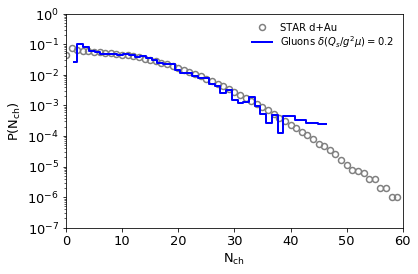

In [49]:
### PLOTTING ###
#plt.semilogy(binneddata[:,0],binneddata[:,1]/tot)
my_dpi=300
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  

ax.set_xticks(range(0,90,10))
ax.set_yticks([10**(n) for n in range(-7,1,1)])
ax.set
plt.xlim([0,60])
plt.ylim([1e-7,1e0])
ax.set_yscale('log')
plt.xlabel(r'$\rm N_{ch}$')
plt.ylabel(r'$\rm P(N_{ch})$')

plt.plot(STARdata[:,0],STARdata[:,1],label='STAR d+Au',linestyle='None',marker='o',fillstyle='none',color='gray',mew=1.5)

# plt.plot(binneddata[2][:,0]+dN[2]/2.0,binneddata[2][:,1]/tot[2],label='$m_{reg}=0.08$',drawstyle='steps',color='b',linewidth=2)
# plt.plot(binneddata[0][:,0]+dN[0]/2.0,binneddata[0][:,1]/tot[0],label='$m_{reg}=0.1$',drawstyle='steps',color='r',linewidth=2)
# plt.plot(binneddata[1][:,0]+dN[1]/2.0,binneddata[1][:,1]/tot[1],label='$m_{reg}=0.12$',drawstyle='steps',color='g',linewidth=2)

#plt.plot(binneddata[0][:,0]+dN[0]/2.0,binneddata[0][:,1]/tot[0],label='Gluons $\delta(Q_s^2/g^2{\mu})=0.5$',drawstyle='steps',color='r',linewidth=2)
# plt.plot(binneddata[1][:,0]+dN[1]/2.0,binneddata[1][:,1]/tot[1],label='Gluons $\delta(Q_s^2/g^2{\mu})=0.4$',drawstyle='steps',color='g',linewidth=2)
# plt.plot(binneddata[2][:,0]+dN[2]/2.0,binneddata[2][:,1]/tot[2],label='Gluons $\delta(Q_s^2/g^2{\mu})=0.3$',drawstyle='steps',color='b',linewidth=2)
# plt.plot(binneddata[3][:,0]+dN[3]/2.0,binneddata[3][:,1]/tot[3],label='Gluons $\delta(Q_s^2/g^2{\mu})=0.1$',drawstyle='steps',color='y',linewidth=2)
# plt.plot(binneddata[4][:,0]+dN[4]/2.0,binneddata[4][:,1]/tot[4],label='Gluons $\delta(Q_s^2/g^2{\mu})=0.0$',drawstyle='steps',color='m',linewidth=2)


# plt.plot(binneddata[0][:,0]+dN[0]/2.0,binneddata[0][:,1]/tot[0],label='Gluons $d_{min}=0.5$',drawstyle='steps',color='r',linewidth=2)
# plt.plot(binneddata[1][:,0]+dN[1]/2.0,binneddata[1][:,1]/tot[1],label='Gluons $d_{min}=0.8$',drawstyle='steps',color='g',linewidth=2)
# plt.plot(binneddata[2][:,0]+dN[2]/2.0,binneddata[2][:,1]/tot[2],label='Gluons $d_{min}=1.2$',drawstyle='steps',color='b',linewidth=2)

# plt.plot(BinnedSelection[0][:,0]*dNdyAVGSTAR/avg[0],BinnedSelection[0][:,1]/tot[0],label='Gluons $Q_s/g^2{\mu}=0.7$',drawstyle='steps-mid',color='r',linewidth=2)
# plt.plot(BinnedSelection[1][:,0]*dNdyAVGSTAR/avg[1],BinnedSelection[1][:,1]/tot[1],label='Gluons $Q_s/g^2{\mu}=0.6$',drawstyle='steps-mid',color='g',linewidth=2)
# plt.plot(BinnedSelection[2][:,0]*dNdyAVGSTAR/avg[2],BinnedSelection[2][:,1]/tot[2],label='Gluons $Q_s/g^2{\mu}=0.5$',drawstyle='steps-mid',color='b',linewidth=2)
# plt.plot(BinnedSelection[3][:,0]*dNdyAVGSTAR/avg[3],BinnedSelection[3][:,1]/tot[3],label='Gluons $Q_s/g^2{\mu}=0.4$',drawstyle='steps-mid',color='c',linewidth=2)

# plt.plot(BinnedSelection[0][:,0]*dNdyAVGSTAR/avg[0],BinnedSelection[0][:,1]/tot[0],label='Gluons $\delta(Q_s/g^2{\mu})=0.5$',drawstyle='steps-mid',color='r',linewidth=2)
# plt.plot(BinnedSelection[1][:,0]*dNdyAVGSTAR/avg[1],BinnedSelection[1][:,1]/tot[1],label='Gluons $\delta(Q_s/g^2{\mu})=0.4$',drawstyle='steps-mid',color='g',linewidth=2)
# plt.plot(BinnedSelection[2][:,0]*dNdyAVGSTAR/avg[2],BinnedSelection[2][:,1]/tot[2],label='Gluons $\delta(Q_s/g^2{\mu})=0.3$',drawstyle='steps-mid',color='b',linewidth=2)
# plt.plot(BinnedSelection[3][:,0]*dNdyAVGSTAR/avg[3],BinnedSelection[3][:,1]/tot[3],label='Gluons $\delta(Q_s/g^2{\mu})=0.1$',drawstyle='steps-mid',color='c',linewidth=2)
# plt.plot(BinnedSelection[4][:,0]*dNdyAVGSTAR/avg[4],BinnedSelection[4][:,1]/tot[4],label='Gluons $\delta(Q_s/g^2{\mu})=0.0$',drawstyle='steps-mid',color='m',linewidth=2)

# plt.plot(BinnedSelection[0][:,0]*dNdyAVGSTAR/avg[0],BinnedSelection[0][:,1]/tot[0],label='Gluons $\delta(Q_s/g^2{\mu})=0.3$ $NRap=50$',drawstyle='steps-mid',color='r',linewidth=2)
#plt.plot(BinnedSelection[1][:,0]*dNdyAVGSTAR/avg[1],BinnedSelection[1][:,1]/tot[1],label='Gluons $\delta(Q_s/g^2{\mu})=0.3$',drawstyle='steps-mid',color='g',linewidth=2)
plt.plot(BinnedSelection[2][:,0]*dNdyAVGSTAR/avg[2],BinnedSelection[2][:,1]/tot[2],label='Gluons $\delta(Q_s/g^2{\mu})=0.2$',drawstyle='steps-mid',color='b',linewidth=2)
#plt.plot(BinnedSelection[3][:,0]*dNdyAVGSTAR/avg[3],BinnedSelection[3][:,1]/tot[3],label='Gluons $\delta(Q_s/g^2{\mu})=0.1$',drawstyle='steps-mid',color='m',linewidth=2)
#plt.plot(BinnedSelection[4][:,0]*dNdyAVGSTAR/avg[4],BinnedSelection[4][:,1]/tot[4],label='Gluons $\delta(Q_s/g^2{\mu})=0.5$',drawstyle='steps-mid',color='c',linewidth=2)

plt.legend(frameon=False,labelspacing=0.1,fontsize='10')

plt.tight_layout()

#plt.savefig('/Users/mark/Desktop/DILUTE_DENSE/NERSC/dAuMult_best_comp.png',dpi=300)
plt.show()

In [43]:
# #module to find best parameters
# Results={}

# NoverAbsNmin = 0.5;
# NoverAbsNmax = 4.0;

# Nbins = 50;
# for fn in range(Nfiles):
#     Minb=14
#     for FACTOR in arange(0.05,0.3,0.05):
#         for MinGluons in arange(0.0,10.0,0.5):
#                 Multiplicity=data[fn][:,0]/FACTOR
#                 ImpactParam=data[fn][:,1]
#                 RedMultiplicity=[]
#                 RedImpactParam=[]

#                 for j in range(size(Multiplicity)):
#                     if Multiplicity[j] > MinGluons:
#                         RedMultiplicity=np.append(RedMultiplicity,Multiplicity[j])
#                         RedImpactParam=np.append(RedImpactParam,ImpactParam[j])

#                 MinN=0
#                 MaxN=max(RedMultiplicity)
#                 deltaN=(MaxN-MinN)/Nbins

#                 BinnedMult={}

#                 BinnedMult=np.zeros((Nbins,3))
#                 for j in range(Nbins):
#                     BinnedMult[j,0]=MinN+(j+0.5)*deltaN

#                 for i in range(size(RedMultiplicity)):
#                     ind=int(np.ceil(RedMultiplicity[i]/deltaN-1e-9))-1
#                     BinnedMult[ind,1]+=RedMultiplicity[i]
#                     #BinnedMult[ind,1]+=1
#                 gridtable=[]

#                 nsteptot=1000
#                 for nstep in range(nsteptot+1):
#                     xv=NoverAbsNmin+nstep*(NoverAbsNmax-NoverAbsNmin)/nsteptot
#                     gridtable=np.append(gridtable,(np.interp(xv, dNdyAVGSTAR*STARdata[:,0], STARdata[:,1])-np.interp(xv, dNdyAVGSTAR*STARdata[:,0], STARdata[:,1]))**2)

                    
#                 Results[fn]=[FACTOR,MinGluons,Minb,0.0]
#                 #print(gridtable)
#                 #IntDiff=s.integrate.simps(BinnedMult[:,1],x=BinnedMult[:,0])

# print(Results)